<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparations" data-toc-modified-id="Preparations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparations</a></span><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Reduce-Data-Set" data-toc-modified-id="Reduce-Data-Set-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Reduce Data Set</a></span></li><li><span><a href="#Scale-Time-and-Amount" data-toc-modified-id="Scale-Time-and-Amount-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Scale Time and Amount</a></span></li><li><span><a href="#Create-a-hold-out-test-set" data-toc-modified-id="Create-a-hold-out-test-set-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Create a hold out test set</a></span></li></ul></li><li><span><a href="#Logistic-Regression-Model-(whole-dataset)" data-toc-modified-id="Logistic-Regression-Model-(whole-dataset)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic Regression Model (whole dataset)</a></span><ul class="toc-item"><li><span><a href="#Define-objective" data-toc-modified-id="Define-objective-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Define objective</a></span></li><li><span><a href="#Cross-Validation-(Grid-Search)" data-toc-modified-id="Cross-Validation-(Grid-Search)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cross Validation (Grid Search)</a></span><ul class="toc-item"><li><span><a href="#Define-parameters" data-toc-modified-id="Define-parameters-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Define parameters</a></span></li><li><span><a href="#Define-CV" data-toc-modified-id="Define-CV-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Define CV</a></span></li><li><span><a href="#Go" data-toc-modified-id="Go-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Go</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Test" data-toc-modified-id="Test-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Test</a></span></li></ul></li><li><span><a href="#Reducing-the-dataset" data-toc-modified-id="Reducing-the-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reducing the dataset</a></span><ul class="toc-item"><li><span><a href="#Under-sampling" data-toc-modified-id="Under-sampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Under-sampling</a></span></li><li><span><a href="#Over-sampling" data-toc-modified-id="Over-sampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Over-sampling</a></span></li></ul></li></ul></div>

## Preparations

In [188]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

seed = 42

### Import data

In [190]:
df = pd.read_csv("../data/creditcard.csv")
print(f"Rows: {df.shape[0]}")
print(f"Cols: {df.shape[1]}")

Rows: 284807
Cols: 31


### Scale Time and Amount

In [191]:
df.Time = StandardScaler().fit_transform(df.Time.values.reshape(-1, 1))
df.Amount = StandardScaler().fit_transform(df.Amount.values.reshape(-1, 1))

### Create a hold out test set

We will keep a certain amount of the data aside for testing purposes. This dataset will remain unseen to the models throughout the whole training and validation pipeline.

In [192]:
X_orig = df.drop('Class', axis=1)
y_orig = df.Class

In [193]:
# X_orig = StandardScaler().fit_transform(X_orig)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.3,
                                              random_state=seed, stratify=y_orig)

## Logistic Regression Model (whole dataset)

### Define objective

In [175]:
# sorted(sklearn.metrics.SCORERS.keys())

In [176]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
# We are dealing with imbalanced data, thus accuracy is meaningless
scoring = 'recall'

### Cross Validation (Grid Search)
https://scikit-learn.org/stable/modules/grid_search.html

#### Define parameters

In [177]:
# see estimator.get_params().keys()
parameters = {
    'C':[0.01, 0.1, 1, 10, 100],
    'max_iter':[500]
}

#### Define CV

In [1]:
GSCV = GridSearchCV(LogisticRegression(random_state=0),
                    param_grid=parameters, scoring=scoring, n_jobs=-1, verbose=2)

NameError: name 'GridSearchCV' is not defined

#### Go

In [179]:
GSCV.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:   16.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   17.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=2)

#### Results

In [180]:
# GSCV.cv_results_

In [181]:
GSCV.best_score_

0.6480392156862745

In [182]:
GSCV.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Test

In [184]:
print("Classification Report (GridSearchCV):\n")
print(classification_report(y_holdout, GSCV.predict(X_holdout)))

Classification Report (GridSearchCV):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.63      0.73       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



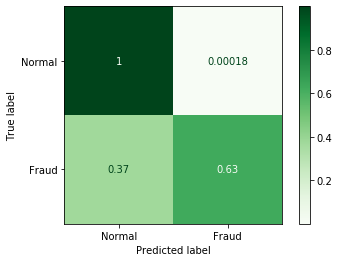

In [185]:
plot_confusion_matrix(GSCV, X_holdout, y_holdout, normalize='true', display_labels=['Normal', 'Fraud'], cmap='Greens')
plt.show()

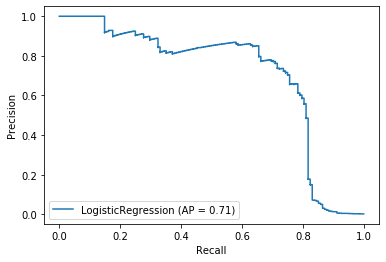

In [186]:
plot_precision_recall_curve(GSCV, X_holdout, y_holdout, name='LogisticRegression')
plt.show()

## Reducing the dataset

Timo mentioned that we do not have to work on the full dataset. Let's draw a sample from the normal cases while keeping all

In [ ]:
# Separate fraudulent and normal transactions
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

### Under-sampling

In [6]:
# Sample a sub set of the normal transactions
df_normal_sub = df_normal.sample(df_fraud.shape[0])

# Merge fraud cases and the normal cases subsample
df_under = pd.concat([df_fraud, df_normal_sub]).sample(frac=1, random_state=seed)

Number of transactions: 984


In [13]:
print("Distribution after Under-sampling:\n")
print(f"Number of transactions: {df_under.shape[0]}")
print(f"Normal: {round(df_under['Class'].value_counts(normalize = True)[0] * 100, 2)} %")
print(f"Fraudulent: {round(df_under['Class'].value_counts(normalize = True)[1] * 100, 2)} %")

Distribution after Under-sampling:

Number of transactions: 984
Normal: 50.0 %
Fraudulent: 50.0 %


### Over-sampling

In [14]:
from imblearn.over_sampling import SMOTE # ref: https://imbalanced-learn.readthedocs.io/

C:\Users\jaengel\AppData\Local\Continuum\miniconda3\envs\creditcardfraud\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\jaengel\AppData\Local\Continuum\miniconda3\envs\creditcardfraud\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\jaengel\AppData\Local\Continuum\miniconda3\envs\creditcardfraud\lib\site-

In [17]:
num_normal_transactions = 5000
df_normal_smote = df_normal.sample(num_normal_transactions)

In [23]:
df_smote_temp = pd.concat([df_fraud, df_normal_smote]).sample(frac=1, random_state=seed)
X_smote = df_smote_temp.drop('Class', axis=1)
y_smote = df_smote_temp['Class']

In [28]:
X_smote, y_smote = SMOTE(sampling_strategy='minority').fit_resample(X_smote, y_smote)

In [27]:
print("Distribution after SMOTE (Over-sampling):\n")
print(f"Number of transactions: {X_smote.shape[0]}")
print(f"Normal: {round(np.bincount(y_smote)[0]/y_smote.shape[0] * 100, 2)} %")
print(f"Fraud: {round(np.bincount(y_smote)[1]/y_smote.shape[0] * 100, 2)} %")

Distribution after SMOTE (Over-sampling):

Number of transactions: 10000
Normal: 50.0 %
Fraud: 50.0 %
